<a href="https://colab.research.google.com/github/skeleton111222/Diabetes-Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow_hub

# **Load Data**

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Length of data**

In [3]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0]),

(268, 500)

# **Visualizing the data**

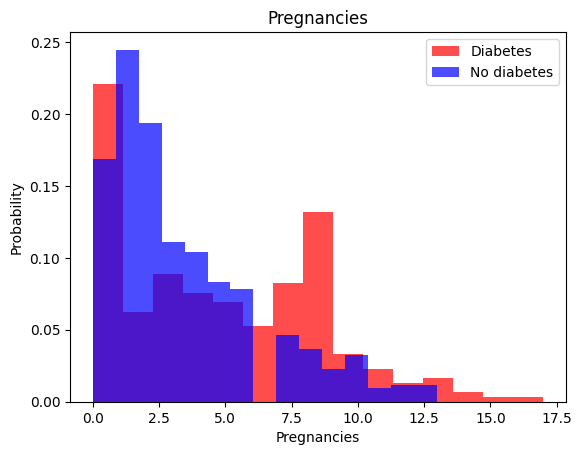

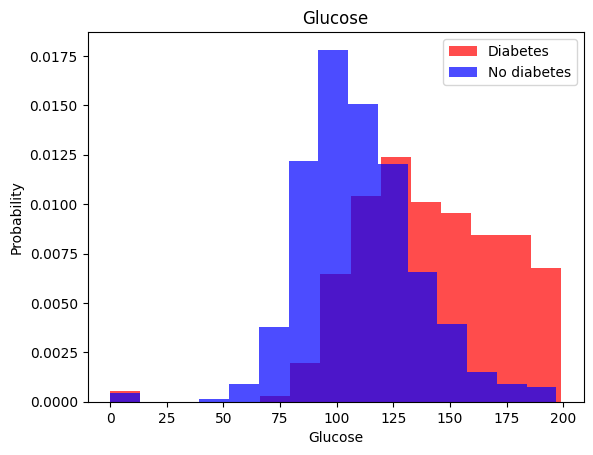

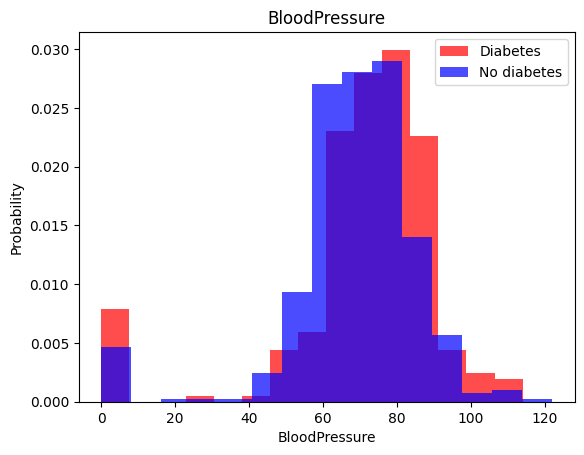

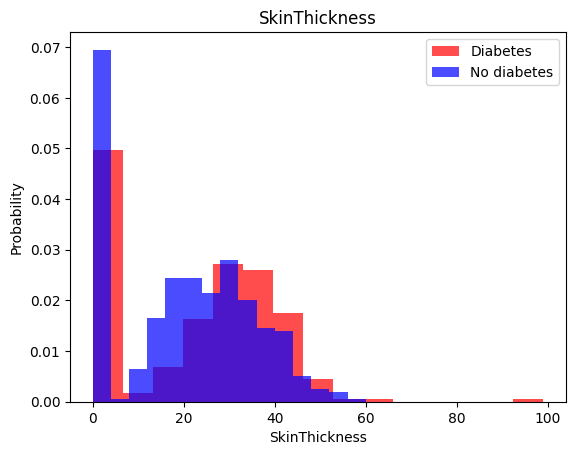

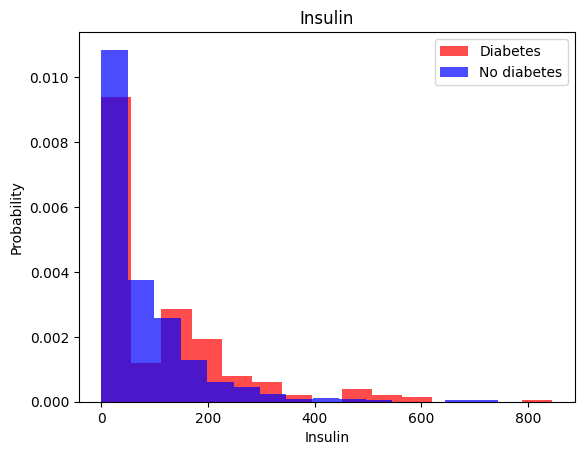

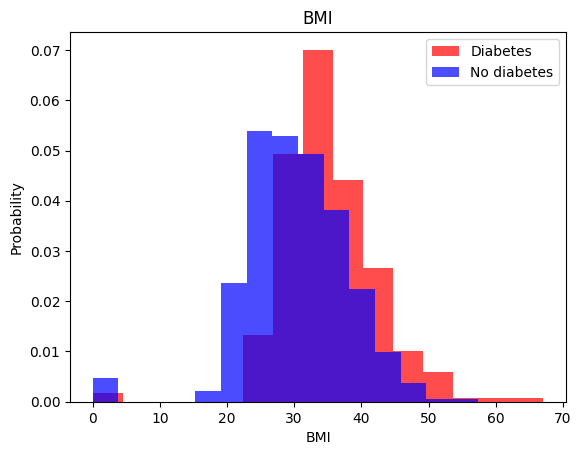

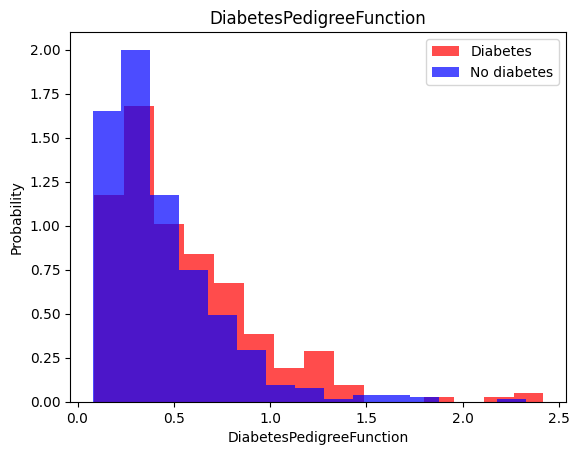

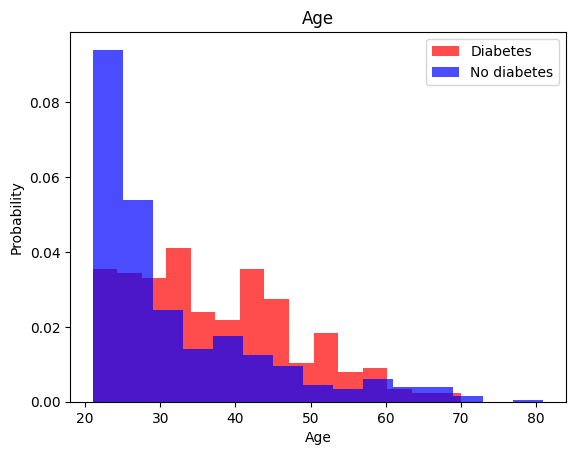

In [4]:
for i in range(len(df.columns[:-1])):
    label=df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color='red',label="Diabetes",alpha=0.7,density=True,bins=15)
    plt.hist(df[df['Outcome']==0][label],color='blue',label="No diabetes",alpha=0.7,density=True,bins=15)
    plt.legend(['Outcome==1','Outcome==0'])
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# **Splits the dataset into inputs(x) and output(y).**

In [5]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values
print(x)


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [6]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

# **Rescales the data.**

In [7]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# **Shape/size of data**

In [8]:
x.shape,y.shape

((768, 8), (768,))

# **Merging Features and Labels into a Single DataFrame**

In [9]:
data =np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)
transformed_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0


# **Visualizing the data**

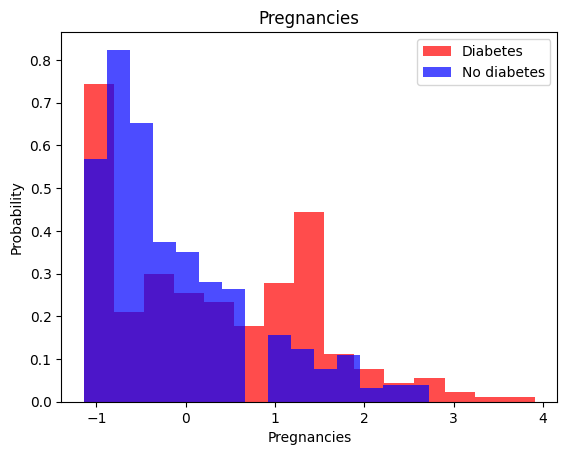

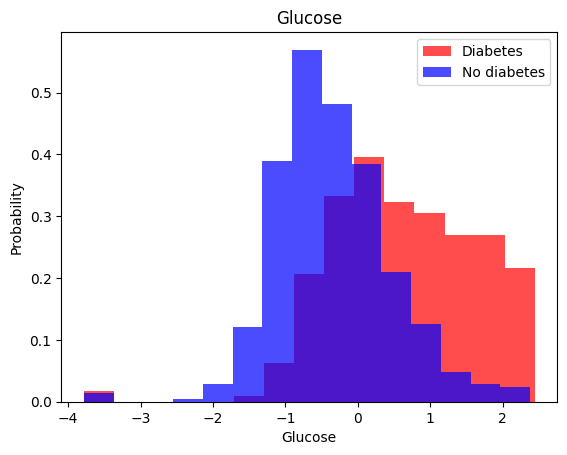

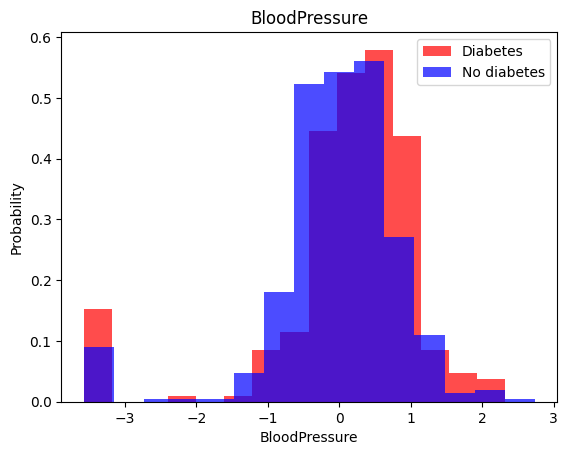

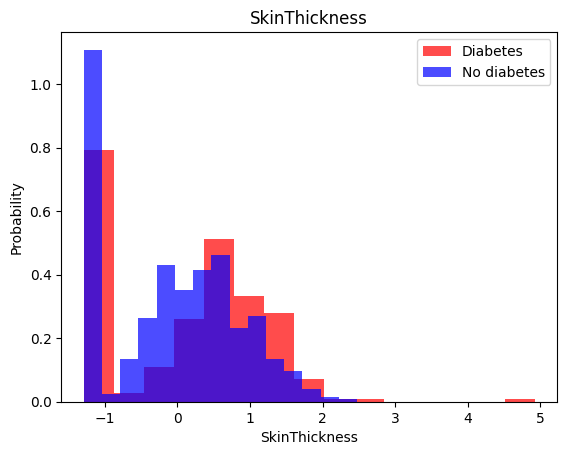

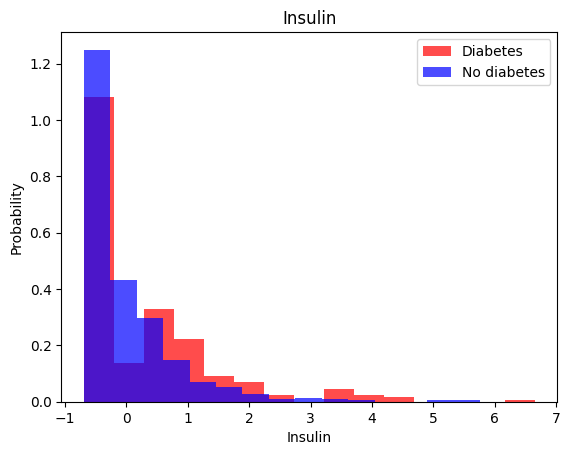

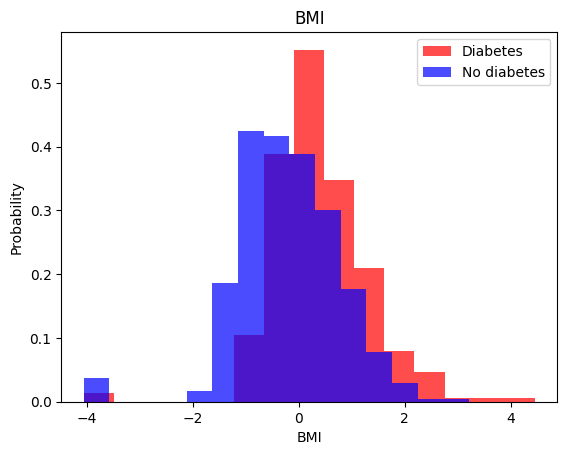

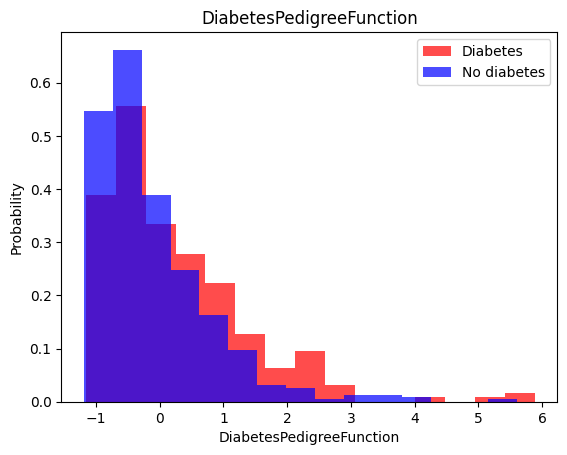

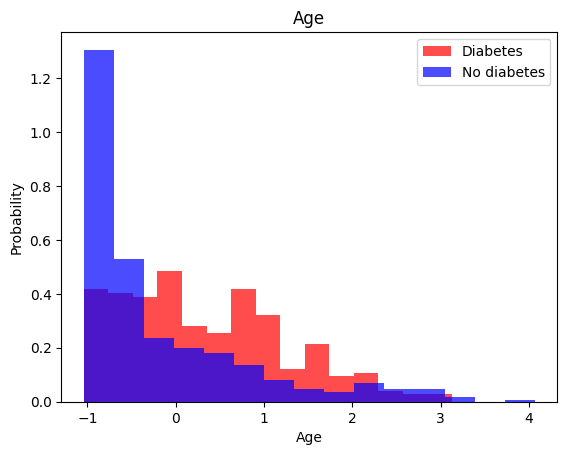

In [10]:
for i in range(len(df.columns[:-1])):
    label=df.columns[i]
    plt.hist(transformed_df[df['Outcome']==1][label],color='red',label="Diabetes",alpha=0.7,density=True,bins=15)
    plt.hist(transformed_df[df['Outcome']==0][label],color='blue',label="No diabetes",alpha=0.7,density=True,bins=15)
    plt.legend(['Outcome==1','Outcome==0'])
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# **Balanced version of original dataset stored as a pandas DataFrame**

In [11]:
over = RandomOverSampler()
x,y=over.fit_resample(x,y)
data =np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)
transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0


# **Length of transformed/balanced data**

In [12]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0]),

(500, 500)

# **Split the data into train test and validation**

In [13]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.4,random_state=0)
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

# **Train the model (a small feedforward neural network with two hidden layers for binary classification)**

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# **Complie & run the model**

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# **Evaluate the model (calculate accuracy & loss)**

In [16]:
model.evaluate(x_train,y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5066 - loss: 0.7340   


[0.731997013092041, 0.5199999809265137]

In [17]:
model.evaluate(x_valid,y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5294 - loss: 0.7195 


[0.7147165536880493, 0.5249999761581421]

In [18]:
model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5527 - loss: 0.6943 - val_accuracy: 0.5950 - val_loss: 0.6554
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6547 - loss: 0.6408 - val_accuracy: 0.6950 - val_loss: 0.6386
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7040 - loss: 0.6239 - val_accuracy: 0.7000 - val_loss: 0.6175
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7444 - loss: 0.6085 - val_accuracy: 0.6950 - val_loss: 0.5999
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7477 - loss: 0.5793 - val_accuracy: 0.6900 - val_loss: 0.5806
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7489 - loss: 0.5484 - val_accuracy: 0.7050 - val_loss: 0.5656
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7547 - loss: 0.5328 - val_accuracy: 0.7050 - val_loss: 0.5468
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7546 - loss: 0.5255 - val_accuracy: 0.7100 - val_loss:

In [19]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7987 - loss: 0.4467 


[0.4801442325115204, 0.7649999856948853]

# **Input data**

In [20]:
#input for one patient (raw values)
sample_input = np.array([[2, 120, 70, 20, 79, 25.5, 0.5, 30]])  # shape (1,8)

# Scale input using the same scaler used for training
sample_input_scaled = scaler.transform(sample_input)

# Make prediction
prediction = model.predict(sample_input_scaled)

print("Predicted probability of diabetes:", prediction[0][0])
print("Predicted class:", "Diabetic" if prediction[0][0] > 0.5 else "Non-Diabetic")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted probability of diabetes: 0.09701566
Predicted class: Non-Diabetic


In [21]:
# 5 example patients
sample_inputs = np.array([
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],  # likely non-diabetic
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],  # likely diabetic
    [4, 89, 66, 23, 94, 28.1, 0.167, 21], # likely non-diabetic
    [10, 115, 0, 0, 0, 35.3, 0.134, 29],  # borderline
    [2, 197, 70, 45, 543, 30.5, 0.158, 53] # likely diabetic
])

sample_inputs_scaled = scaler.transform(sample_inputs)

# Make predictions
predictions = model.predict(sample_inputs_scaled)

for i, pred in enumerate(predictions):
    print(f"Patient {i+1}: Probability of diabetes = {pred[0]:.2f}, Class = {'Diabetic' if pred[0]>0.5 else 'Non-Diabetic'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Patient 1: Probability of diabetes = 0.12, Class = Non-Diabetic
Patient 2: Probability of diabetes = 0.83, Class = Diabetic
Patient 3: Probability of diabetes = 0.05, Class = Non-Diabetic
Patient 4: Probability of diabetes = 0.62, Class = Diabetic
Patient 5: Probability of diabetes = 0.96, Class = Diabetic
